# Project Description

The goal of the project is to conduct the research to help optimize marketing expenses, based on the data from the analytical department at Yandex.Afisha for the period from June 2017 through May 2018.

<b>Available data:</b>

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

<b>Objects of study:</b>

- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

## Download the data and prepare it for analysis

In [1]:
home = %pwd
print(home)
if home != 'C:/Users/Coami':
    
    !pip install -Uq matplotlib --user
    !pip install -Uq numpy --user
    !pip install -Uq pandas --user
    !pip install -Uq plotly --user
    
    !pip install -Uq seaborn --user
    !pip install -Uq sidetable --user
    

C:\Users\Sophie\Personal_proj


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.4 which is incompatible.


In [2]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import datetime
import random
   # !pip install -Uq seaborn --user
    #!pip install -Uq plotly --user
   # !pip install plotly
   # !pip install -Uq plotly --user
import sys
    #!conda install --yes --prefix {sys.prefix} plotly
import plotly as px
import plotly.express as px


<b> Optimize the data for analysis.

In [4]:
try:
    visits = pd.read_csv('visits_log_us.csv', nrows=500)
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)

visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [5]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

In [6]:
visits['Source Id'].value_counts()

4     159
3     122
5      92
2      52
1      39
9      19
10     17
Name: Source Id, dtype: int64

In [7]:
try:
    visits = pd.read_csv(
    'visits_log_us.csv',
    dtype={'Device': 'category','Source Id':'category'},
    parse_dates=['Start Ts', 'End Ts'])
except:
    visits = pd.read_csv(
    '/datasets/visits_log_us.csv',
    dtype={'Device': 'category','Source Id':'category'},
    parse_dates=['Start Ts', 'End Ts'])
    
    
visits=visits.rename(columns={"Device": "device", "End Ts": "end_ts","Source Id":"source_id","Start Ts":"start_ts","Uid":"uid"})
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  category      
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB


In [8]:
try:
    orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
    
except:
    orders = pd.read_csv('orders_log_us.csv', nrows=500) 
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [9]:
orders.head()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [10]:
try:
    orders = pd.read_csv(
    '/datasets/orders_log_us.csv',
    parse_dates=['Buy Ts'],)

except:
    orders = pd.read_csv(
    'orders_log_us.csv',
    parse_dates=['Buy Ts'],)

orders=orders.rename(columns={"Buy Ts": "buy_ts","Revenue":"revenue","Uid":"uid"})

orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
try:
    costs = pd.read_csv('costs_us.csv', nrows=500)
except:
    costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)
    
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [12]:
costs['source_id'].value_counts()

1    363
2    137
Name: source_id, dtype: int64

In [13]:
costs['costs'].describe()

count    500.000000
mean      65.715440
std       35.374315
min        5.800000
25%       41.390000
50%       59.345000
75%       81.542500
max      272.590000
Name: costs, dtype: float64

In [14]:
try:
    costs = pd.read_csv(
    '/datasets/costs_us.csv',
    dtype={'source_id':'category'},
    parse_dates=['dt'],
)

except:
    costs = pd.read_csv(
    'costs_us.csv',
    dtype={'source_id':'category'},
    parse_dates=['dt'],
)

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 43.0 KB


<b>Conclusion

The data was uploaded.

All dates within the data were changed to the date datatype. Columns were renamed for convenience. The source and devices information was read as categorical datatype due to the memory limitations.


## Make reports and calculate metrics

### Product

<b> How many people use it every day, week, and month?

In [15]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
dau_total = (
    visits.groupby(['session_year', 'session_date'])
    .agg({'uid': 'nunique'})
    .mean()
)

wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
print(int(dau_total),'people used it every day')
print(int(wau_total),'people used it every week')
print(int(mau_total),'people used it every month')

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4048\3328251206.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['start_ts'].dt.week


907 people used it every day
5716 people used it every week
23228 people used it every month


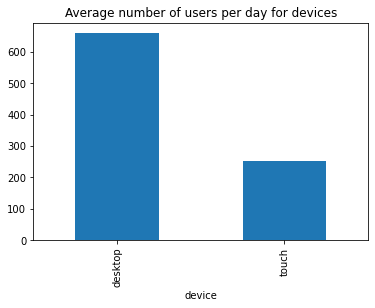

In [16]:
visits.pivot_table(index='session_date', columns='device', values='uid', aggfunc='nunique').mean().plot(kind='bar')
plt.title('Average number of users per day for devices')
plt.show()


Number of the desktop version users are significantly exceed the number of mobile version users.


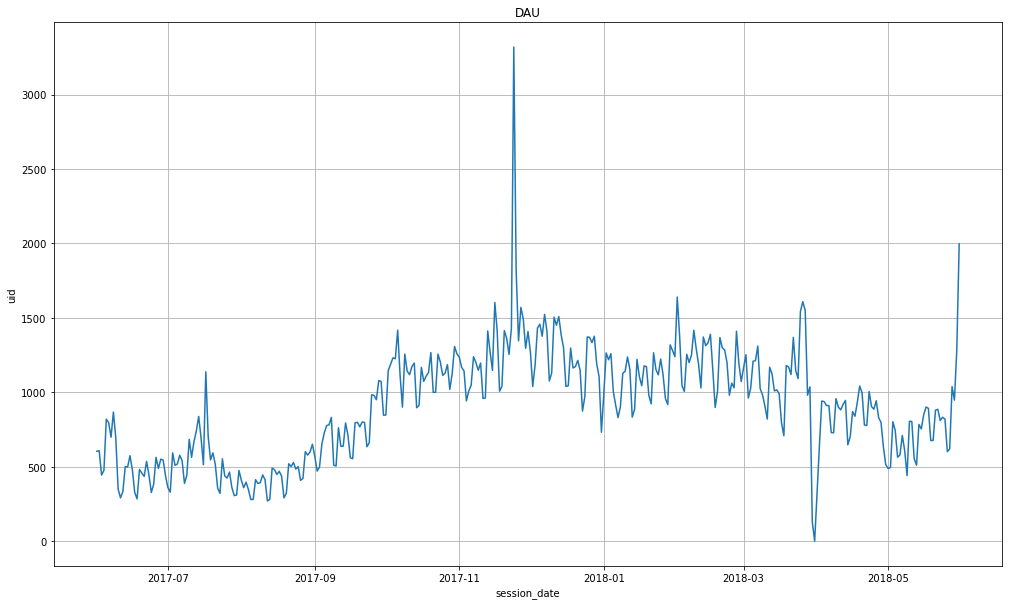

In [17]:
dau_= visits.pivot_table(index=('session_year','session_date'),values='uid',aggfunc=pd.Series.nunique).reset_index()
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=dau_, x="session_date", y="uid") # hue="platform",markers ="o")
plt.title('DAU')
plt.grid()
plt.show()

We can see the rise starting from September with noticeable peaks and outliers in the data.

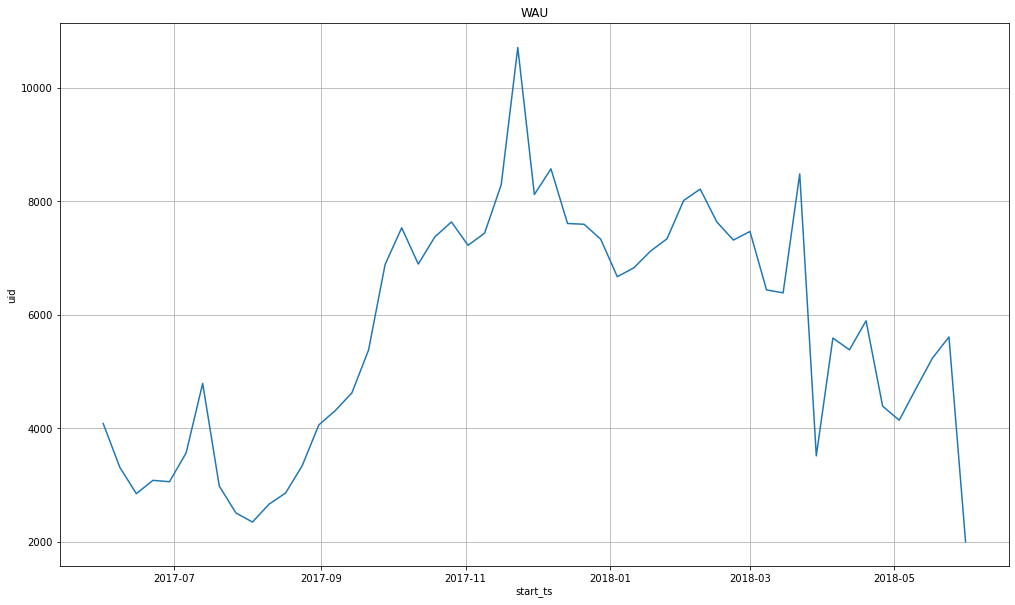

In [18]:
wau_= visits.groupby([visits['start_ts'].astype('datetime64[W]')]).agg({'uid': 'nunique'}).reset_index()
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=wau_, x="start_ts", y="uid") # hue="platform",markers ="o")
plt.title('WAU')
plt.grid()
plt.show()

The graph correlates with the DAU graph, we see rise at autumn with significant peaks.

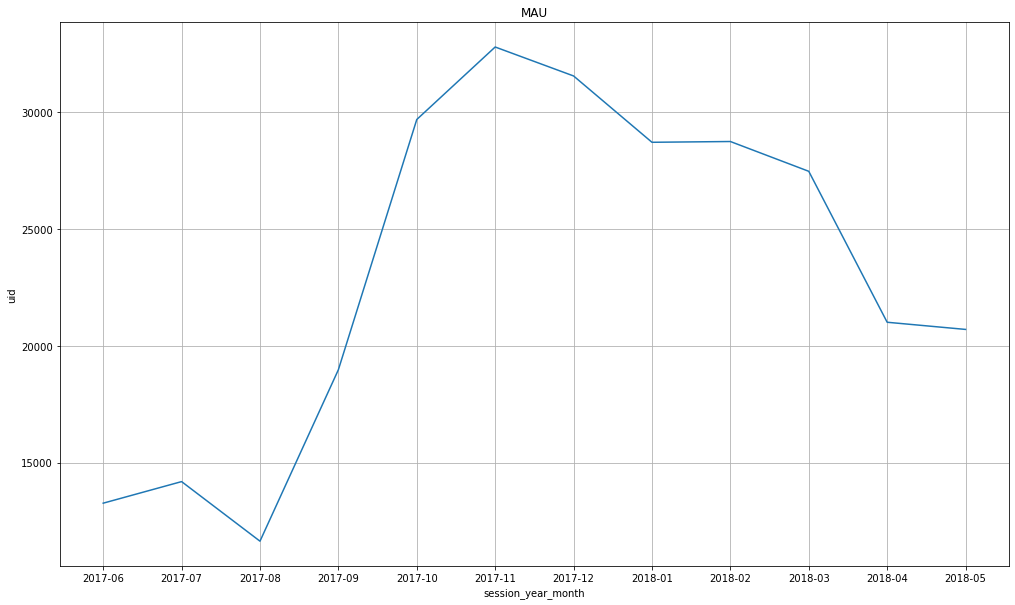

In [19]:
visits['session_year_month'] = visits['start_ts'].dt.strftime('%Y-%m')
mau_= visits.pivot_table(index='session_year_month',values='uid',aggfunc=pd.Series.nunique).reset_index()
mau_
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=mau_, x="session_year_month", y="uid") # hue="platform",markers ="o")
plt.grid()
plt.title('MAU')
plt.show()

The overall tendencies are that the most visitors are in November-December, and after the number of visitors start to decline.

In [20]:
sticky_wau=dau_total/wau_total*100
sticky_mau=dau_total/mau_total*100
print('Sticky factor for week:',int(sticky_wau),'%')
print('Sticky factor for month:',int(sticky_mau),'%')

Sticky factor for week: 15 %
Sticky factor for month: 3 %


In [21]:
dau_['session_date']=dau_['session_date'].astype('datetime64')
dau_['session_year_month'] = dau_['session_date'].dt.strftime('%Y-%m')

sticky_mau_=dau_.merge(mau_, how = 'left', left_on='session_year_month', right_on='session_year_month')
sticky_mau_['sticky_f']=round(sticky_mau_['uid_x']/sticky_mau_['uid_y']*100)
sticky_mau_


session_year session_date  uid_x session_year_month  uid_y  sticky_f
0            2017   2017-06-01    605            2017-06  13259       5.0
1            2017   2017-06-02    608            2017-06  13259       5.0
2            2017   2017-06-03    445            2017-06  13259       3.0
3            2017   2017-06-04    476            2017-06  13259       4.0
4            2017   2017-06-05    820            2017-06  13259       6.0
..            ...          ...    ...                ...    ...       ...
359          2018   2018-05-27    620            2018-05  20701       3.0
360          2018   2018-05-28   1039            2018-05  20701       5.0
361          2018   2018-05-29    948            2018-05  20701       5.0
362          2018   2018-05-30   1289            2018-05  20701       6.0
363          2018   2018-05-31   1997            2018-05  20701      10.0

[364 rows x 6 columns]

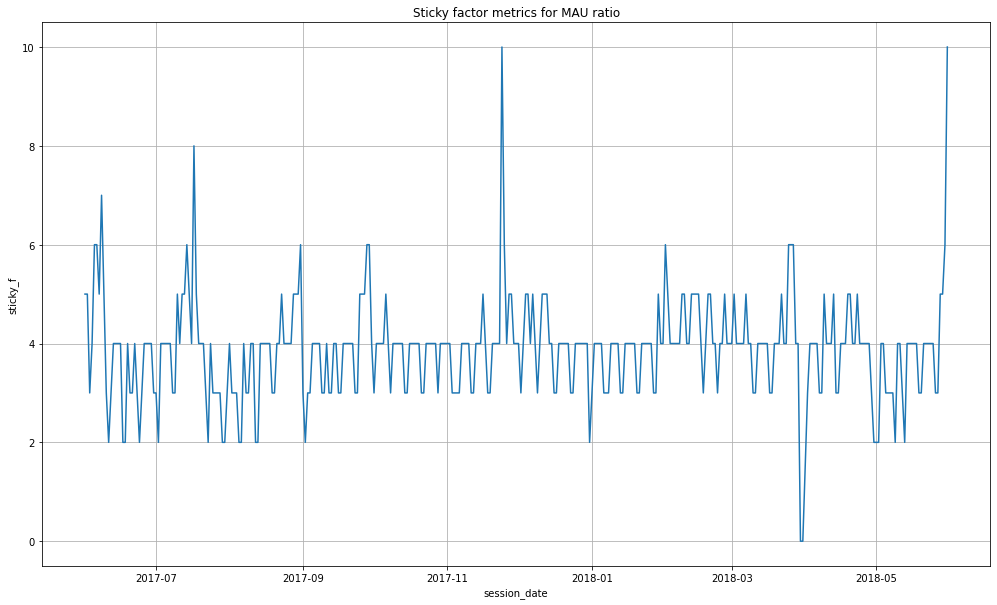

In [22]:
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=sticky_mau_, x="session_date", y="sticky_f") 
plt.title('Sticky factor metrics for MAU ratio')
plt.grid()
plt.show()

<b> How many sessions are there per day?

In [23]:
sessions_per_user = visits.groupby(['session_date']).agg(
    {'uid': ['count', 'nunique']}
).reset_index()
sessions_per_user.columns = ['session_date','n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)

print(sessions_per_user) 

    session_date  n_sessions  n_users  sessions_per_user
0     2017-06-01         664      605           1.097521
1     2017-06-02         658      608           1.082237
2     2017-06-03         477      445           1.071910
3     2017-06-04         510      476           1.071429
4     2017-06-05         893      820           1.089024
..           ...         ...      ...                ...
359   2018-05-27         672      620           1.083871
360   2018-05-28        1156     1039           1.112608
361   2018-05-29        1035      948           1.091772
362   2018-05-30        1410     1289           1.093871
363   2018-05-31        2256     1997           1.129695

[364 rows x 4 columns]


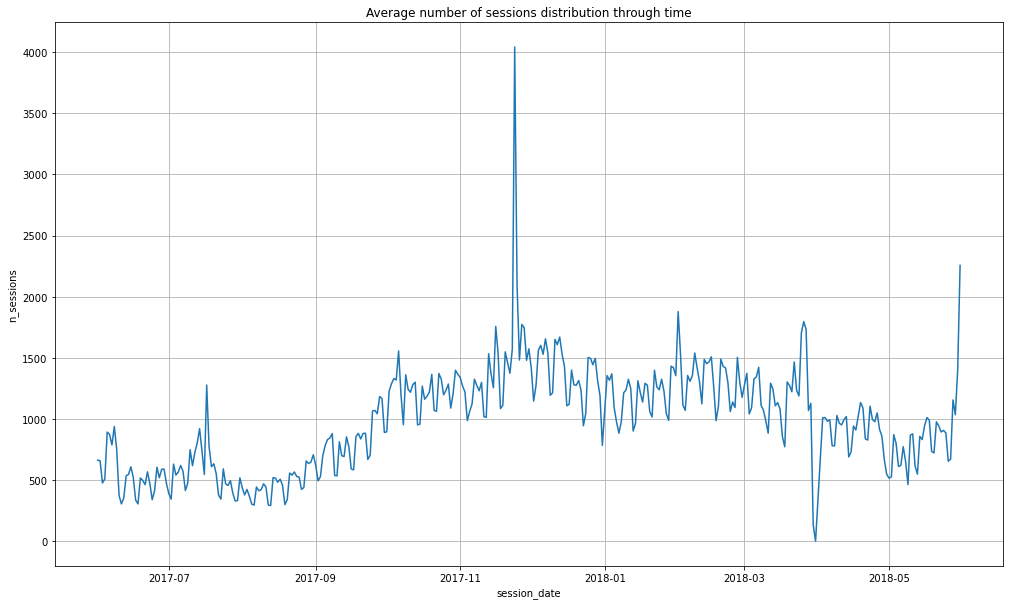

In [24]:
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=sessions_per_user, x="session_date", y="n_sessions") 
plt.title('Average number of sessions distribution through time')
plt.grid()
plt.show()

Number of sessions correlates with number of users. Rise in November-December.

In [25]:
print("The average number of sessions per day: {0:.2f} ".format(sessions_per_user['n_sessions'].mean()))

The average number of sessions per day: 987.36 


<b> What is the length of each session?

Average session length: 60


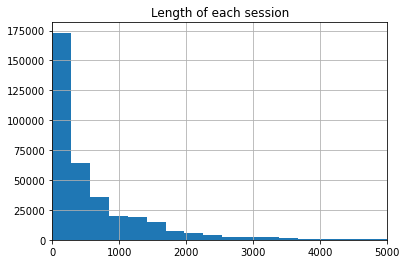

In [26]:
visits['session_duration_sec'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds
visits['session_duration_sec'].hist(bins=300)
asl=visits['session_duration_sec'].mode()[0]
print('Average session length:',asl)
plt.title('Length of each session')
plt.xlim(0,5000)
plt.show()

We have unnaturally long sessions in the data, but the average session is around 1 minute.

<b> How often do users come back?

In [27]:
user_activity=visits[['uid','source_id','device','start_ts']]
first_activity_date = user_activity.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = user_activity.join(first_activity_date, on='uid')
user_activity['activity_month']= user_activity['start_ts'].dt.strftime('%Y-%m')
user_activity['first_activity_month']= user_activity['first_activity_date'].dt.strftime('%Y-%m')
user_activity

uid source_id   device            start_ts  \
0       16879256277535980062         4    touch 2017-12-20 17:20:00   
1         104060357244891740         2  desktop 2018-02-19 16:53:00   
2        7459035603376831527         5    touch 2017-07-01 01:54:00   
3       16174680259334210214         9  desktop 2018-05-20 10:59:00   
4        9969694820036681168         3  desktop 2017-12-27 14:06:00   
...                      ...       ...      ...                 ...   
359395  18363291481961487539         2  desktop 2017-07-29 19:07:00   
359396  18370831553019119586         1    touch 2018-01-25 17:38:00   
359397  18387297585500748294         4  desktop 2018-03-03 10:12:00   
359398  18388616944624776485         5  desktop 2017-11-02 10:12:00   
359399  18396128934054549559         2    touch 2017-09-10 13:13:00   

       first_activity_date activity_month first_activity_month  
0      2017-12-20 17:20:00        2017-12              2017-12  
1      2018-02-19 16:53:00        2018-02              2018-02  
2      2017-07-01 01:54:00        2017-07              2017-07  
3      2018-03-09 20:05:00        2018-05              2018-03  
4      2017-12-27 14:06:00        2017-12              2017-12  
...                    ...            ...                  ...  
359395 2017-07-29 19:07:00        2017-07              2017-07  
359396 2018-01-25 17:38:00        2018-01              2018-01  
359397 2018-03-03 10:12:00        2018-03              2018-03  
359398 2017-11-02 10:12:00        2017-11              2017-11  
359399 2017-09-10 13:13:00        2017-09              2017-09  

[359400 rows x 7 columns]

In [28]:
user_activity['activity_month']=pd.to_datetime(user_activity['activity_month'])
user_activity['first_activity_month']=pd.to_datetime(user_activity['first_activity_month'])
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uid                   359400 non-null  uint64        
 1   source_id             359400 non-null  category      
 2   device                359400 non-null  category      
 3   start_ts              359400 non-null  datetime64[ns]
 4   first_activity_date   359400 non-null  datetime64[ns]
 5   activity_month        359400 non-null  datetime64[ns]
 6   first_activity_month  359400 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](4), uint64(1)
memory usage: 14.4 MB


In [29]:
user_activity['cohort_lifetime'] = (
    user_activity['activity_month'] - user_activity['first_activity_month']
)
user_activity['cohort_lifetime'] = user_activity[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype(int)

user_activity

uid source_id   device            start_ts  \
0       16879256277535980062         4    touch 2017-12-20 17:20:00   
1         104060357244891740         2  desktop 2018-02-19 16:53:00   
2        7459035603376831527         5    touch 2017-07-01 01:54:00   
3       16174680259334210214         9  desktop 2018-05-20 10:59:00   
4        9969694820036681168         3  desktop 2017-12-27 14:06:00   
...                      ...       ...      ...                 ...   
359395  18363291481961487539         2  desktop 2017-07-29 19:07:00   
359396  18370831553019119586         1    touch 2018-01-25 17:38:00   
359397  18387297585500748294         4  desktop 2018-03-03 10:12:00   
359398  18388616944624776485         5  desktop 2017-11-02 10:12:00   
359399  18396128934054549559         2    touch 2017-09-10 13:13:00   

       first_activity_date activity_month first_activity_month  \
0      2017-12-20 17:20:00     2017-12-01           2017-12-01   
1      2018-02-19 16:53:00     2018-02-01           2018-02-01   
2      2017-07-01 01:54:00     2017-07-01           2017-07-01   
3      2018-03-09 20:05:00     2018-05-01           2018-03-01   
4      2017-12-27 14:06:00     2017-12-01           2017-12-01   
...                    ...            ...                  ...   
359395 2017-07-29 19:07:00     2017-07-01           2017-07-01   
359396 2018-01-25 17:38:00     2018-01-01           2018-01-01   
359397 2018-03-03 10:12:00     2018-03-01           2018-03-01   
359398 2017-11-02 10:12:00     2017-11-01           2017-11-01   
359399 2017-09-10 13:13:00     2017-09-01           2017-09-01   

        cohort_lifetime  
0                     0  
1                     0  
2                     0  
3                     2  
4                     0  
...                 ...  
359395                0  
359396                0  
359397                0  
359398                0  
359399                0  

[359400 rows x 8 columns]

<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

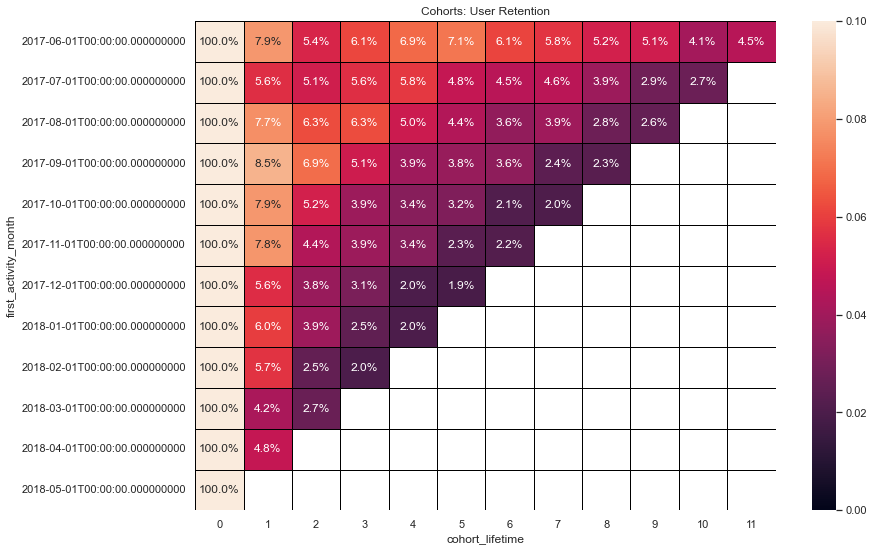

In [30]:
cohorts = user_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

initial_users_count =cohorts[cohorts['cohort_lifetime']== 0][
    ['first_activity_month', 'uid']
]

initial_users_count =initial_users_count.rename(
    columns={'uid': 'cohort_users'}
) 

cohorts =cohorts.merge(initial_users_count, on='first_activity_month') 


cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black', vmin= 0, vmax= 0.1
)


<b> Conclusion

1. Based on the average amount of visitors throughout the year we can see that visits start to increase in autumn with the peak on November-December, and then slowly drops till reaches the minimum in summer with occasional peaks. We can assume that it's connected with the seasons of the events, for example, most theatre productions open in autumn, but summer usually is the "dead" season. Also, there are usually a lot of holidays during autumn and winter.
2. Each user has one session per day on average.
The dynamic of how many sessions per day is coincidental with the DAU.
3. We have anomaly long sessions within the data. The median session is 1 minute.
4. The highest retention belongs to the June cohort. A lot of people use the platform and stick to it through the autumn and winter. As it was mentioned before, it might be because events are seasonal.

### Sales

<b> When do people start buying?

In [31]:
orders_=orders.pivot_table(index='uid',values='buy_ts', aggfunc = 'min').reset_index()
orders_.head()
orders_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   uid     36523 non-null  uint64        
 1   buy_ts  36523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 570.8 KB


In [32]:
visits_=visits.pivot_table(index='uid',values='start_ts', aggfunc = 'min').reset_index()
visits_.head(10)
visits_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   uid       228169 non-null  uint64        
 1   start_ts  228169 non-null  datetime64[ns]
dtypes: datetime64[ns](1), uint64(1)
memory usage: 3.5 MB


In [33]:
buys=orders_.merge(visits_[['uid','start_ts']], on='uid')
buys['conversion']=buys['buy_ts'] - buys['start_ts'] 
buys['conversion'] = buys[
    'conversion'
] / np.timedelta64(1, 'D')
buys['conversion'] = buys['conversion'].round().astype(int) 

buys

uid              buy_ts            start_ts  \
0           313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00   
1          1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2          2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00   
3          2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00   
4          2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   
...                     ...                 ...                 ...   
36518  18445147675727495770 2017-11-24 09:03:00 2017-08-20 13:30:00   
36519  18445407535914413204 2017-09-22 23:55:00 2017-09-22 23:48:00   
36520  18445601152732270159 2018-03-26 22:54:00 2017-08-07 11:51:00   
36521  18446156210226471712 2018-02-18 19:34:00 2017-11-07 10:01:00   
36522  18446167067214817906 2017-10-17 10:16:00 2017-10-17 10:05:00   

       conversion  
0             107  
1               0  
2               0  
3               1  
4               0  
...           ...  
36518          96  
36519           0  
36520         231  
36521         103  
36522           0  

[36523 rows x 4 columns]

In [34]:
import plotly.express as px

In [35]:
fig = px.histogram(buys, x="conversion",nbins=30,title='Conversion time')

fig.show()

Most of the orders were made within the short time after the usage of the website. 

In [36]:
buys['conversion'].median()

0.0

In [37]:
print(' The overall conversion is {:.1%}'.format(buys['uid'].nunique()/visits_['uid'].nunique()))

 The overall conversion is 16.0%


<b>How many orders do they make during a given period of time?

In [38]:
#defining cohort month through first purchase
orders['month']=orders['buy_ts'].astype('datetime64[M]')
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_date'
orders=orders.join(first_order_date, on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

orders.head()

buy_ts  revenue                   uid      month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

     first_order_date first_order_month  
0 2017-06-01 00:10:00        2017-06-01  
1 2017-06-01 00:25:00        2017-06-01  
2 2017-06-01 00:27:00        2017-06-01  
3 2017-06-01 00:29:00        2017-06-01  
4 2017-06-01 07:58:00        2017-06-01

In [39]:
orders.sample(5)

buy_ts  revenue                   uid      month  \
33340 2018-02-07 09:54:00     3.67   1631356693099033031 2018-02-01   
12254 2017-10-11 20:16:00     6.11   4148716401875468484 2017-10-01   
43657 2018-04-10 12:10:00     4.89   3971030471691518392 2018-04-01   
45602 2018-04-26 14:19:00     1.98   6093855166159309373 2018-04-01   
28026 2018-01-04 13:44:00     2.44  13719347206112370408 2018-01-01   

         first_order_date first_order_month  
33340 2018-02-07 09:54:00        2018-02-01  
12254 2017-10-11 20:16:00        2017-10-01  
43657 2018-04-10 12:10:00        2018-04-01  
45602 2017-07-11 23:19:00        2017-07-01  
28026 2018-01-04 13:44:00        2018-01-01

In [40]:
#let's define cohort size
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes.head()

first_order_month  cohort_size
0        2017-06-01         2023
1        2017-07-01         1923
2        2017-08-01         1370
3        2017-09-01         2581
4        2017-10-01         4340

In [41]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
#merge cohort with cohort size
cohort=cohort.merge(cohort_sizes,on=['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer']=cohort['orders']/cohort['cohort_size']
cohort.head()

first_order_month      month  orders  cohort_size  age_month  \
0        2017-06-01 2017-06-01    2354         2023        0.0   
1        2017-06-01 2017-07-01     177         2023        1.0   
2        2017-06-01 2017-08-01     174         2023        2.0   
3        2017-06-01 2017-09-01     226         2023        3.0   
4        2017-06-01 2017-10-01     292         2023        4.0   

   orders_per_buyer  
0          1.163618  
1          0.087494  
2          0.086011  
3          0.111715  
4          0.144340

In [42]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month          0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
first_order_month                                                               
2017-06-01         1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   2.1   
2017-07-01         1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47  1.49   
2017-08-01         1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   1.6   
2017-09-01         1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5         
2017-10-01         1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38               
2017-11-01         1.18  1.28  1.32  1.37  1.41  1.42  1.45                     
2017-12-01         1.15  1.21  1.26   1.3  1.32  1.34                           
2018-01-01         1.12  1.19  1.24  1.25  1.28                                 
2018-02-01         1.12  1.18  1.21  1.22                                       
2018-03-01         1.17  1.22  1.27                                             
2018-04-01         1.10  1.18                                                   
2018-05-01         1.09                                                         
2018-06-01         1.00                                                         

age_month          10.0  11.0  
first_order_month              
2017-06-01         2.15  2.19  
2017-07-01         1.51        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01                     
2018-06-01

<b>What is the average purchase size?

In [43]:
avg_check=orders.groupby(['uid'])['revenue'].mean().reset_index()
fig = px.histogram(avg_check, x="revenue", title='Average purchase size')
fig.show()

Most of the purchase sizes are within 10.

In [44]:
avg_cohort=orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
avg_cohort.head()

first_order_month      month   revenue  age_month
0        2017-06-01 2017-06-01  4.060106        0.0
1        2017-06-01 2017-07-01  5.547006        1.0
2        2017-06-01 2017-08-01  5.088161        2.0
3        2017-06-01 2017-09-01  8.545575        3.0
4        2017-06-01 2017-10-01  7.084178        4.0

In [45]:

avg_cohort_piv=avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')

age_month          0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_order_month                                                          
2017-06-01         4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01         5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01         4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01         4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01         4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01         4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01         4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01         3.69   4.44   6.45   7.52   2.71                        
2018-02-01         3.71   4.58   3.45   3.87                               
2018-03-01         4.14   5.97   6.33                                      
2018-04-01         4.25    6.2                                             
2018-05-01         4.29                                                    
2018-06-01         3.42                                                    

age_month          8.0    9.0    10.0  11.0  
first_order_month                            
2017-06-01         5.28   8.01  12.04  6.04  
2017-07-01         5.35  11.79   5.65        
2017-08-01          8.7    5.6               
2017-09-01         7.79                      
2017-10-01                                   
2017-11-01                                   
2017-12-01                                   
2018-01-01                                   
2018-02-01                                   
2018-03-01                                   
2018-04-01                                   
2018-05-01                                   
2018-06-01

In [46]:
orders['revenue'].mean()

4.999646930476993

<b>How much money do they bring? (LTV)

In [47]:
orders.head(10)

buy_ts  revenue                   uid      month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01   
7 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01   
8 2017-06-01 09:22:00     3.30  17542070709969841479 2017-06-01   
9 2017-06-01 09:23:00     0.37   1074355127080856382 2017-06-01   

     first_order_date first_order_month  
0 2017-06-01 00:10:00        2017-06-01  
1 2017-06-01 00:25:00        2017-06-01  
2 2017-06-01 00:27:00        2017-06-01  
3 2017-06-01 00:29:00        2017-06-01  
4 2017-06-01 07:58:00        2017-06-01  
5 2017-06-01 08:43:00        2017-06-01  
6 2017-06-01 08:54:00        2017-06-01  
7 2017-06-01 09:22:00        2017-06-01  
8 2017-06-01 09:22:00        2017-06-01  
9 2017-06-01 09:23:00        2017-06-01

In [48]:
#get the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_order_month','month','revenue']
#merge with the cohort size
ltv_cohort=ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

first_order_month      month   revenue  cohort_size  age       ltv
0         2017-06-01 2017-06-01   9557.49         2023  0.0  4.724414
1         2017-06-01 2017-07-01    981.82         2023  1.0  0.485329
2         2017-06-01 2017-08-01    885.34         2023  2.0  0.437637
3         2017-06-01 2017-09-01   1931.30         2023  3.0  0.954671
4         2017-06-01 2017-10-01   2068.58         2023  4.0  1.022531
..               ...        ...       ...          ...  ...       ...
74        2018-03-01 2018-05-01   1114.87         3533  2.0  0.315559
75        2018-04-01 2018-04-01  10600.69         2276  0.0  4.657597
76        2018-04-01 2018-05-01   1209.92         2276  1.0  0.531599
77        2018-05-01 2018-05-01  13925.76         2988  0.0  4.660562
78        2018-06-01 2018-06-01      3.42            1  0.0  3.420000

[79 rows x 6 columns]

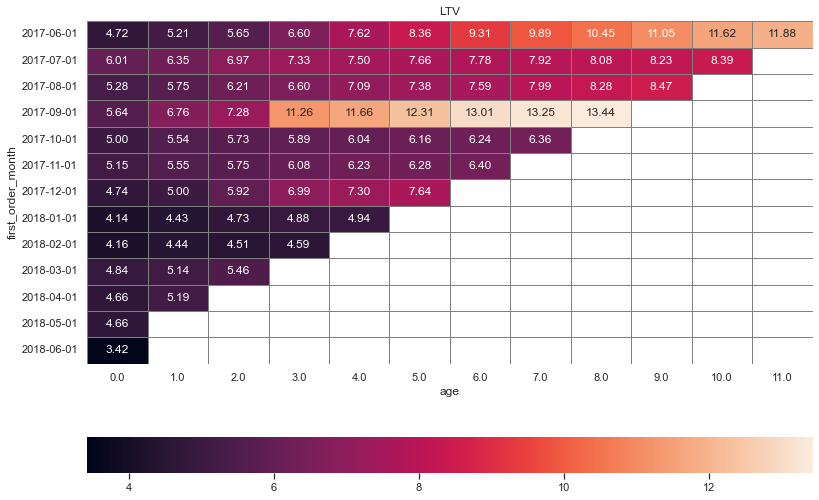

<Figure size 936x648 with 0 Axes>

In [49]:
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
plt.figure(figsize=(13, 9))
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.figure(figsize=(13, 9))
plt.show()

<b> Conclusion

1. People start buying the same day they start using the service. The overall conversion is 16%.
2. On average people make one or two purchases each month.
3. The average purchase size is around 5.  The most profitable time is at the end of the year, it correlates with all that was mentioned above, autumn months and December are the most profitable. Also, people seem to spend most money several months after using the service. 
4. The most profitable cohort are September one followed by summer users.

### Marketing

<b> How much money was spent? Overall/per source/over time

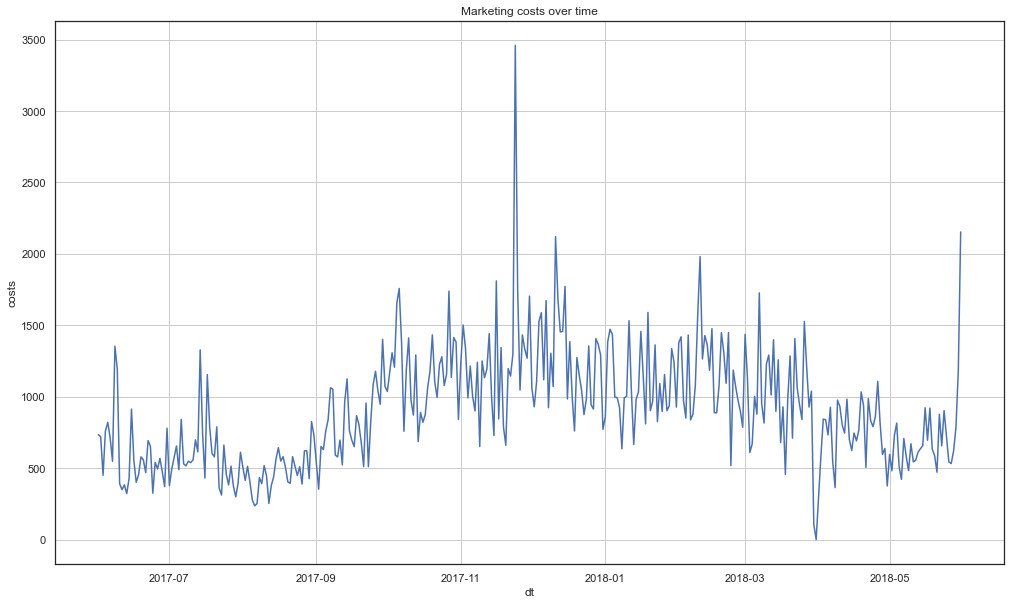

In [50]:
costs_=costs.sort_values(by=['dt','source_id'])
costs_.head()
costs_dt=costs_.groupby(['dt']).sum().reset_index()
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=costs_dt, x="dt", y="costs") 
plt.title('Marketing costs over time')
plt.grid()
plt.show()


The most money on the marketing was spent in November-December.

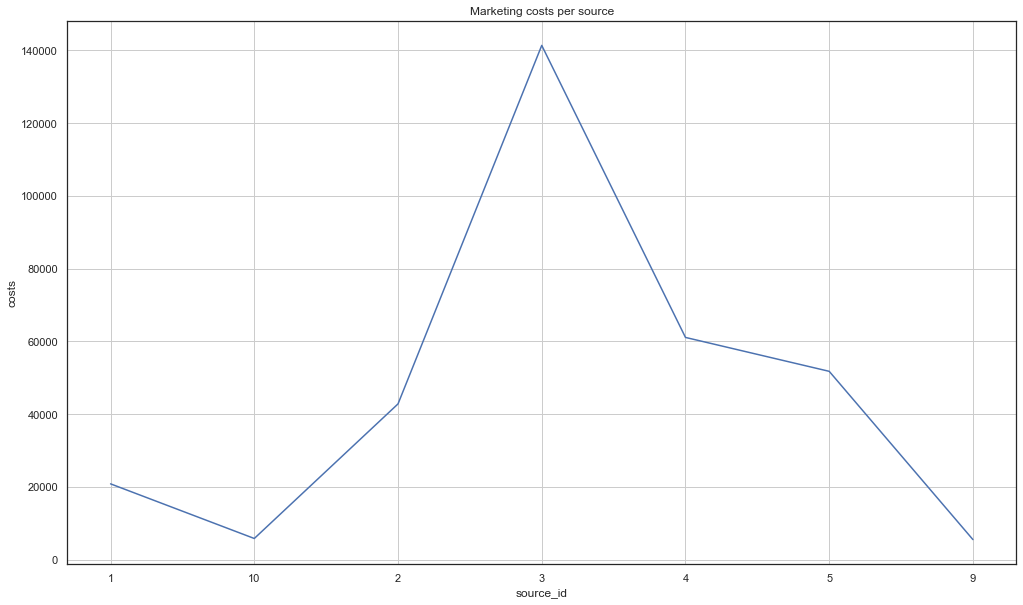

In [51]:
costs_s=costs_.groupby(['source_id']).sum().reset_index()
fig,ax=plt.subplots(figsize=(17,10))
sns.lineplot(data=costs_s, x="source_id", y="costs") 
plt.title('Marketing costs per source')
plt.grid()
plt.show()


Sources 3,4 and 5 are the most expansive.

In [52]:
print('Total marketing cost is {}'.format(costs['costs'].sum()))

Total marketing cost is 329131.62


<b>How much did customer acquisition from each of the sources cost?

In [53]:
orders

buy_ts  revenue                   uid      month  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   
...                   ...      ...                   ...        ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-01   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-01   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-01   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-01   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01   

         first_order_date first_order_month  
0     2017-06-01 00:10:00        2017-06-01  
1     2017-06-01 00:25:00        2017-06-01  
2     2017-06-01 00:27:00        2017-06-01  
3     2017-06-01 00:29:00        2017-06-01  
4     2017-06-01 07:58:00        2017-06-01  
...                   ...               ...  
50410 2018-05-31 23:50:00        2018-05-01  
50411 2018-05-31 23:50:00        2018-05-01  
50412 2018-05-31 23:54:00        2018-05-01  
50413 2018-05-31 23:56:00        2018-05-01  
50414 2018-06-01 00:02:00        2018-06-01  

[50415 rows x 6 columns]

In [54]:
costs['costs_month']=costs['dt'].astype('datetime64[M]')
costs

source_id         dt  costs costs_month
0            1 2017-06-01  75.20  2017-06-01
1            1 2017-06-02  62.25  2017-06-01
2            1 2017-06-03  36.53  2017-06-01
3            1 2017-06-04  55.00  2017-06-01
4            1 2017-06-05  57.08  2017-06-01
...        ...        ...    ...         ...
2537        10 2018-05-27   9.92  2018-05-01
2538        10 2018-05-28  21.26  2018-05-01
2539        10 2018-05-29  11.32  2018-05-01
2540        10 2018-05-30  33.15  2018-05-01
2541        10 2018-05-31  17.60  2018-05-01

[2542 rows x 4 columns]

In [55]:
costs_by_month=costs.groupby(['costs_month'])['costs'].sum().reset_index()
costs_by_month.head()

costs_month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88

In [56]:
customers_per_moth=orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
customers_per_moth.columns=['costs_month','customers']
customers_per_moth.head()

costs_month  customers
0  2017-06-01       2023
1  2017-07-01       1923
2  2017-08-01       1370
3  2017-09-01       2581
4  2017-10-01       4340

In [57]:
CAC_per_month=costs_by_month.merge(customers_per_moth,how='left',on=['costs_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['customers']
CAC_per_month.head()

costs_month     costs  customers        CAC
0  2017-06-01  18015.00       2023   8.905091
1  2017-07-01  18240.59       1923   9.485486
2  2017-08-01  14790.54       1370  10.796015
3  2017-09-01  24368.91       2581   9.441654
4  2017-10-01  36322.88       4340   8.369327

In [58]:
fig = px.line(CAC_per_month, x="costs_month", y="CAC", title='CAC')
fig.show()

The highest CAC was during July-August period. 

<b>CAC per source

In [59]:
visits

device              end_ts source_id            start_ts  \
0         touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1       desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2         touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3       desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4       desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   
...         ...                 ...       ...                 ...   
359395  desktop 2017-07-29 19:07:19         2 2017-07-29 19:07:00   
359396    touch 2018-01-25 17:38:19         1 2018-01-25 17:38:00   
359397  desktop 2018-03-03 10:12:19         4 2018-03-03 10:12:00   
359398  desktop 2017-11-02 10:12:19         5 2017-11-02 10:12:00   
359399    touch 2017-09-10 13:13:19         2 2017-09-10 13:13:00   

                         uid  session_year  session_month  session_week  \
0       16879256277535980062          2017             12            51   
1         104060357244891740          2018              2             8   
2        7459035603376831527          2017              7            26   
3       16174680259334210214          2018              5            20   
4        9969694820036681168          2017             12            52   
...                      ...           ...            ...           ...   
359395  18363291481961487539          2017              7            30   
359396  18370831553019119586          2018              1             4   
359397  18387297585500748294          2018              3             9   
359398  18388616944624776485          2017             11            44   
359399  18396128934054549559          2017              9            36   

       session_date session_year_month  session_duration_sec  
0        2017-12-20            2017-12                  1080  
1        2018-02-19            2018-02                  1680  
2        2017-07-01            2017-07                     0  
3        2018-05-20            2018-05                  1440  
4        2017-12-27            2017-12                     0  
...             ...                ...                   ...  
359395   2017-07-29            2017-07                    19  
359396   2018-01-25            2018-01                    19  
359397   2018-03-03            2018-03                    19  
359398   2017-11-02            2017-11                    19  
359399   2017-09-10            2017-09                    19  

[359400 rows x 11 columns]

In [60]:
visits.groupby(['uid'])['source_id'].nunique().head()

uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: source_id, dtype: int64

In [61]:
first_source=visits.sort_values('start_ts').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()

uid first_source
0   11863502262781            3
1   49537067089222            2
2  297729379853735            3
3  313578113262317            2
4  325320750514679            5

In [62]:
purchase=orders.merge(first_source,on=['uid'],how='left')
purchase.head()

buy_ts  revenue                   uid      month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01   

     first_order_date first_order_month first_source  
0 2017-06-01 00:10:00        2017-06-01            1  
1 2017-06-01 00:25:00        2017-06-01            2  
2 2017-06-01 00:27:00        2017-06-01            2  
3 2017-06-01 00:29:00        2017-06-01            2  
4 2017-06-01 07:58:00        2017-06-01            3

In [63]:
costs_by_month_source=costs.groupby(['costs_month','source_id'])['costs'].sum().reset_index()
costs_by_month_source.head()

costs_month source_id    costs
0  2017-06-01         1  1125.61
1  2017-06-01        10   314.22
2  2017-06-01         2  2427.38
3  2017-06-01         3  7731.65
4  2017-06-01         4  3514.80

In [64]:
customers_per_moth_source=purchase.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
customers_per_moth_source.columns=['costs_month','source_id','customers']
customers_per_moth_source.head()

costs_month source_id  customers
0  2017-06-01         1        190
1  2017-06-01        10         95
2  2017-06-01         2        235
3  2017-06-01         3        638
4  2017-06-01         4        413

In [65]:
CAC_per_month_source=costs_by_month_source.merge(customers_per_moth_source,how='left',on=['costs_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['customers']
CAC_per_month_source.head()

costs_month source_id    costs  customers        CAC
0  2017-06-01         1  1125.61        190   5.924263
1  2017-06-01        10   314.22         95   3.307579
2  2017-06-01         2  2427.38        235  10.329277
3  2017-06-01         3  7731.65        638  12.118574
4  2017-06-01         4  3514.80        413   8.510412

In [66]:
#plotting cac dynamics
fig = px.line(CAC_per_month_source, x="costs_month", y="CAC",color='source_id',title='CAC')
fig.show()

Sources 2 and 3 are the most expensive for the customer's acquirement. CAC for sources 9 and 10 are beneath the average.

<b>How worthwhile where the investments? (ROI)

<b>ROI per cohort

In [67]:
CAC_per_month_ROI=CAC_per_month[['costs_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']
ROI=ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

first_order_month      month  revenue  cohort_size  age       ltv       CAC
0        2017-06-01 2017-06-01  9557.49         2023  0.0  4.724414  8.905091
1        2017-06-01 2017-07-01   981.82         2023  1.0  0.485329  8.905091
2        2017-06-01 2017-08-01   885.34         2023  2.0  0.437637  8.905091
3        2017-06-01 2017-09-01  1931.30         2023  3.0  0.954671  8.905091
4        2017-06-01 2017-10-01  2068.58         2023  4.0  1.022531  8.905091

In [68]:
ROI['ROI']=ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

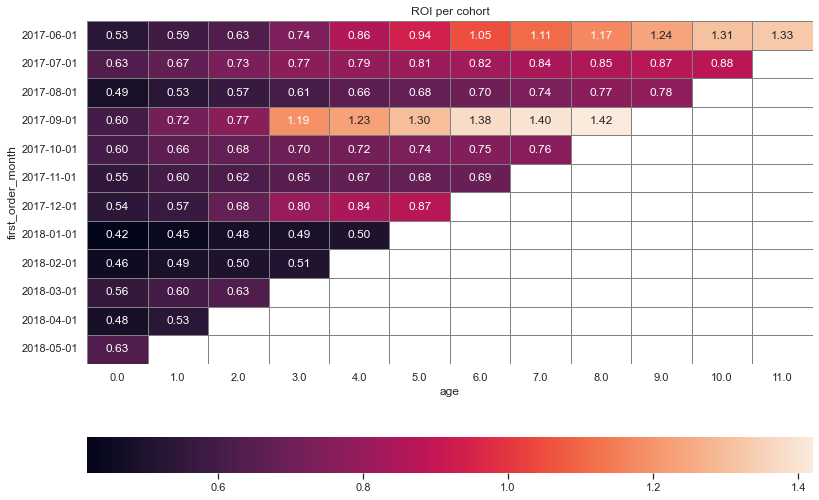

In [69]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

<b>ROI per source

In [70]:
ltv_per_source=purchase.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','customers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['customers']
ltv_per_source

C:\Users\Sophie\AppData\Local\Temp\ipykernel_4048\1304129202.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



source_id  customers   revenue        ltv
0         1       2899  31090.55  10.724577
1        10       1329   4450.33   3.348631
2         2       3506  46923.61  13.383802
3         3      10473  54511.24   5.204931
4         4      10296  56696.83   5.506685
5         5       6931  52624.02   7.592558
6         6          0      0.00        NaN
7         7          1      1.22   1.220000
8         9       1088   5759.40   5.293566

In [71]:
roi_per_source=costs_s.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['customers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id      costs  customers   revenue        ltv        cac      romi
0         1   20833.27       2899  31090.55  10.724577   7.186364  1.492351
1        10    5822.49       1329   4450.33   3.348631   4.381106  0.764335
2         2   42806.04       3506  46923.61  13.383802  12.209367  1.096191
3         3  141321.63      10473  54511.24   5.204931  13.493901  0.385725
4         4   61073.60      10296  56696.83   5.506685   5.931779  0.928336
5         5   51757.10       6931  52624.02   7.592558   7.467479  1.016750
6         9    5517.49       1088   5759.40   5.293566   5.071222  1.043844

In [72]:
fig = px.bar(roi_per_source, x='source_id', y='romi', title='ROMI')
fig.update_xaxes(type='category')
fig.show()

We are intrested on ROMI above 1: sources 1,2,4,5,9. Sources 10 and 3 are signigicantly below 1.

<b>Conclusion

1. Marketing costs correlate with the seasonal buying peaks. The most money is spent on the source 3. 
2.The costs of marketing per customer are highest for sources  3 and 2.
3.Only expenses on sources 1,2,5 and 9 are profitable.

## Conclusion

As a result of the conducted research, I would recommend focusing marketing expenses on source 1, since it's the cheapest and the most profitable one.

We also see that people prefer using a desktop version of the service. So it might be worth checking if a mobile version of the website is easy to work with and/or functioning correctly. 

Overall we see that interest in our service is seasonal and strongly correlated with the number of events throughout the year. Therefore we might correct our expenses on marketing depending on the season. 